Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                         

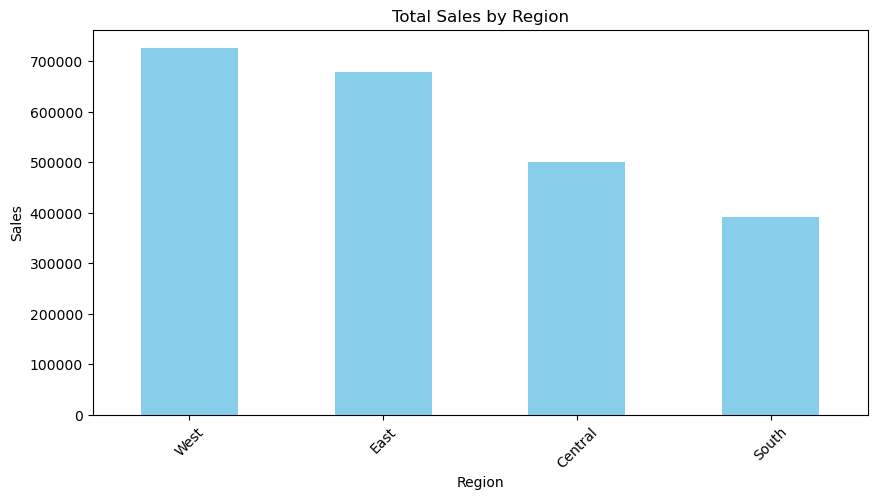

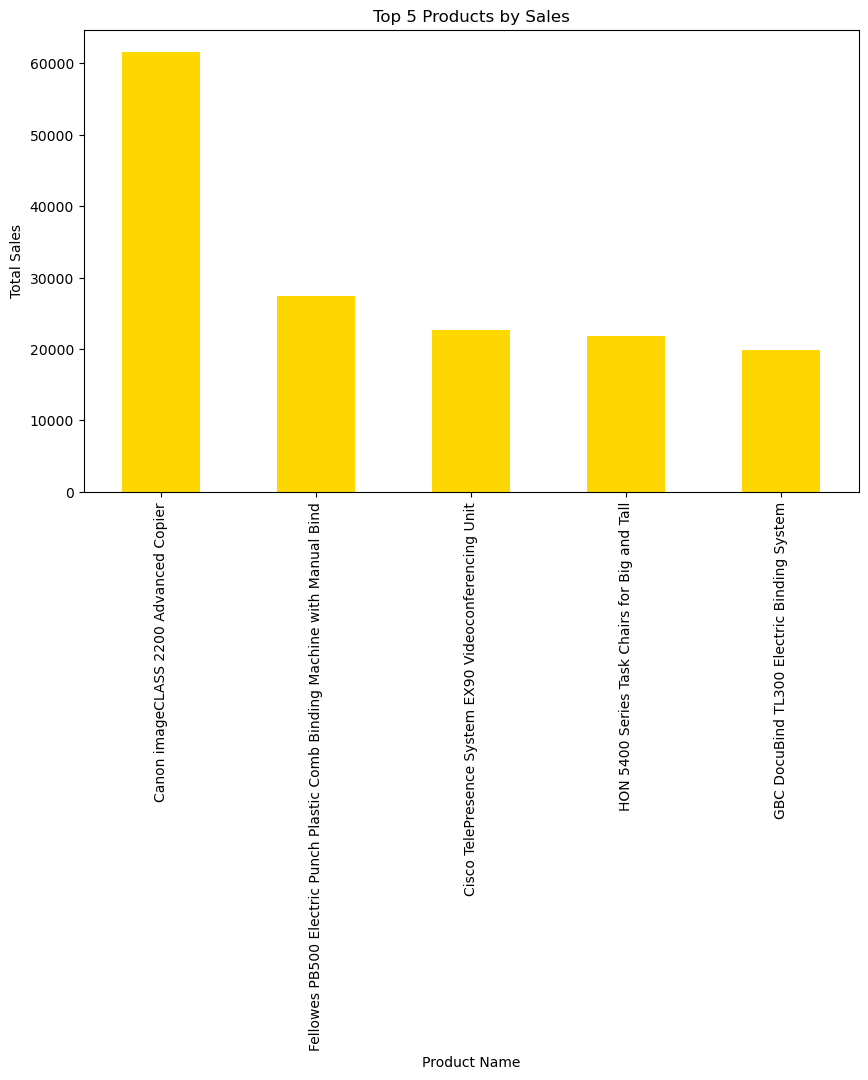

Order Date
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160


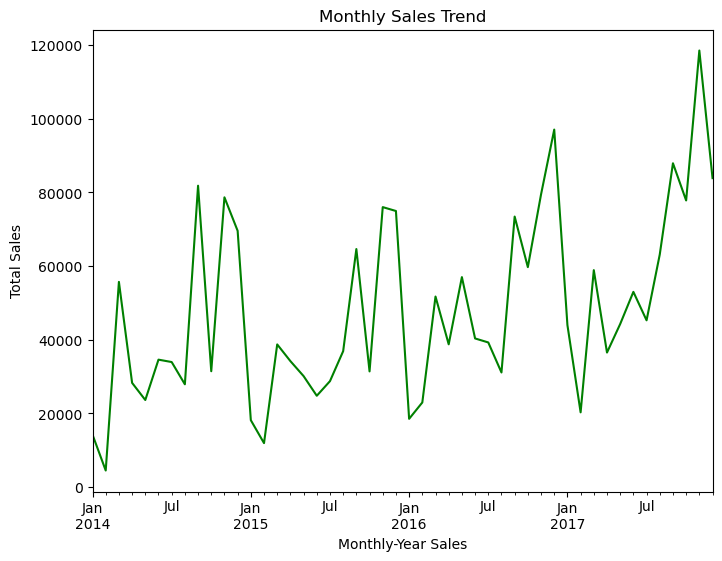

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


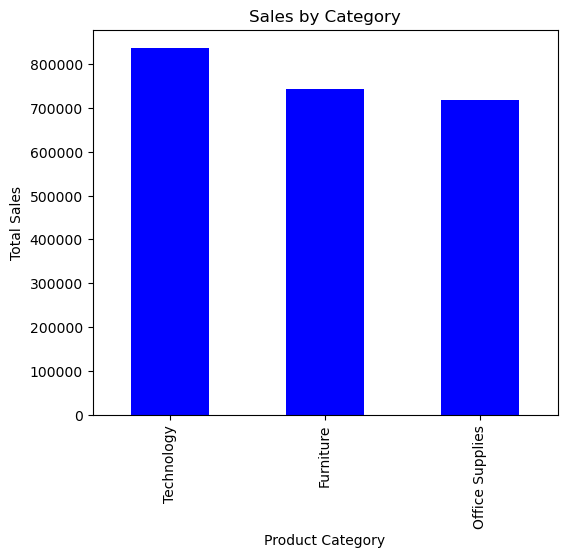

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64


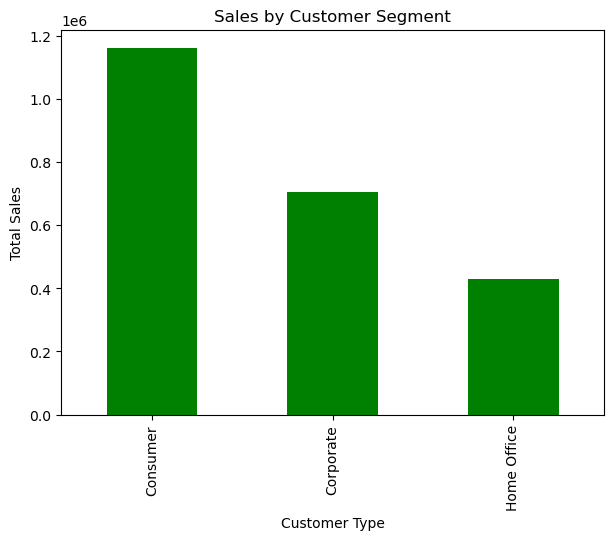

Ship Mode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64


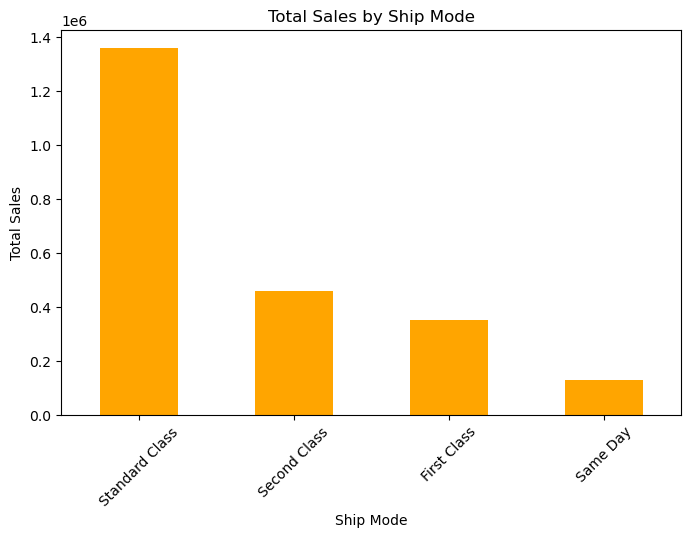

Category    Furniture  Office Supplies  Technology
Region                                            
Central   163797.1638       167026.415  170416.312
East      208291.2040       205516.055  264973.981
South     117298.6840       125651.313  148771.908
West      252612.7435       220853.249  251991.832


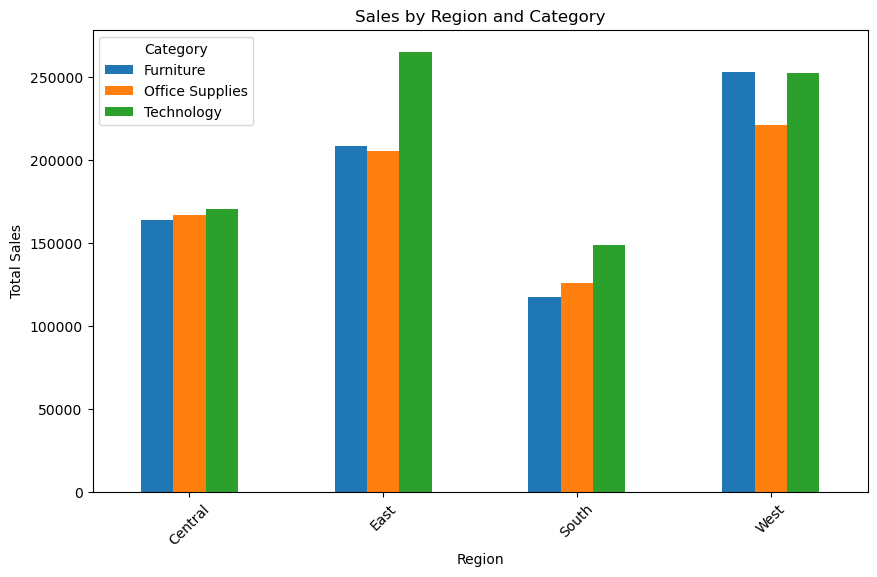

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


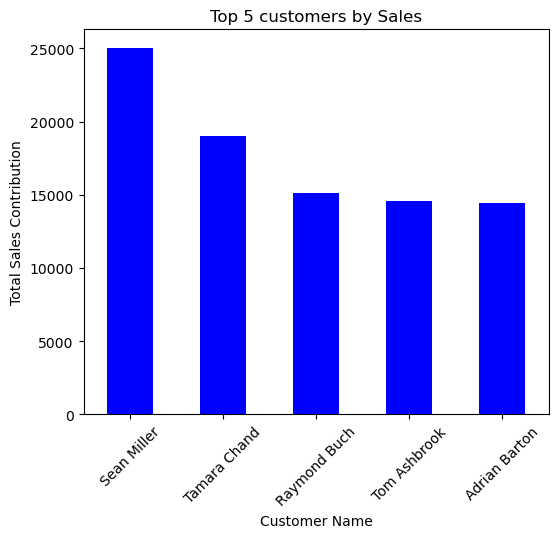

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sample - Superstore.csv" , encoding = 'latin1')
df.head() # this shows the dataset in tabular format.

df.isnull().sum() # this finds for missing values
df.duplicated() # search for duplicate columns-rows

print(df.columns)

region_sales = df.groupby("Region")['Sales'].sum().sort_values(ascending = False) # group data between Region and Sales
print(region_sales)

top_products = df.groupby("Product Name")['Sales'].sum().sort_values(ascending = False).head(5) # group data between Sales and Product
print(region_sales)
print(top_products)

region_sales.plot(kind = 'bar' , figsize = (10 , 5) , color = 'skyblue')

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()

top_products.plot(kind = 'bar' , figsize = (10,6) , color = 'gold')

plt.title("Top 5 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

df["Order Date"] = pd.to_datetime(df["Order Date"])

monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum() # converts the date order to year-month format
print(monthly_sales)

# Graph plot for Monthly aggregation / trends
monthly_sales.plot(kind = "line" , figsize = (8,6) , color = "green")

plt.title("Monthly Sales Trend")
plt.xlabel("Monthly-Year Sales")
plt.ylabel("Total Sales")
plt.show()         

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)
print(category_sales)

category_sales.plot(kind = 'bar' , figsize = (6,5) , color = 'blue')

plt.title("Sales by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

segment_sales = df.groupby("Segment")['Sales'].sum().sort_values(ascending = False)
print(segment_sales)

segment_sales.plot(kind = 'bar', figsize = (7 , 5) , color = "green")

plt.title("Sales by Customer Segment")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()


shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
print(shipmode_sales)

shipmode_sales.plot(kind='bar', color='orange', figsize=(8,5), title='Total Sales by Ship Mode')

plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Create pivot table: rows = Region, columns = Category, values = Total Sales(sum)
pivot_sales = pd.pivot_table(df, values='Sales', index='Region', columns='Category', aggfunc='sum', fill_value=0)
print(pivot_sales)

pivot_sales.plot(kind='bar', figsize=(10,6) )
plt.title("Sales by Region and Category")

plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category') # helps to understand which bar belongs to which category(product type).
plt.show()

# identifying key customers contributing to most revenue

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(5)
print(top_customers)

top_customers.plot(kind = "bar" , figsize = (6,5) , color = "blue")

plt.title("Top 5 customers by Sales")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales Contribution")
plt.xticks(rotation = 45)
plt.show() # chart reflects Sean Miller contributes the most in revenue


